# TASK-4

#####  AIRSS1237

##### Tejasvani

Subject:Perform EDA on a dataset of your choice.
    
### Explanation of the Task:

* EDA is the process of investigating the dataset to discover patterns, and anomalies (outliers) of the dataset.
* It involves generating summary statistics for numerical data in the dataset & creating various graphical representations to understand the data better.

<span style="font-size:20px;color:#0026D8;font-weight : bold">Dataset Description:</span>


  - **Pregnancies** - Number of times pregnant.
  - **Glucose** - Plasma glucose concentration a 2 hours in an oral glucose tolerance test.
  - **BloodPressure**-Diastolic blood pressure (mm Hg).
  - **SkinThickness**-Triceps skinfold thickness (mm).
  - **Insulin**-2-Hour serum insulin (mu U/ml).
  - **BMI**-Body mass index (weight in kg/(height in m)^2).
  - **DiabetesPedigreeFunction**-Diabetes pedigree function.
  - **Age**- years
  - **Outcome**- Class variable (0 or 1).

<h1 style="background-color:#ABFF9B;font-size:20px;color:#00033E;font-weight : bold"> Importing Required Libraries</h1>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


<h1 style="background-color:#ABFF9B;font-size:20px;color:#00033E;font-weight : bold">Read the data </h1>

In [3]:
data=pd.read_csv("diabetes.csv")

In [4]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
## Check the shape of data.
data.shape

(768, 9)

In [6]:
outcome_truecount=len(data.loc[data['Outcome']==1])
outcome_falsecount=len(data.loc[data['Outcome']==0])

In [7]:
(outcome_truecount,outcome_falsecount)

(268, 500)

In [8]:
print(data.columns)

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')


In [9]:
#let's replace zero values with NAN.
data[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']] = data[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']].replace(0, np.nan)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   763 non-null    float64
 2   BloodPressure             733 non-null    float64
 3   SkinThickness             541 non-null    float64
 4   Insulin                   394 non-null    float64
 5   BMI                       757 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 54.1 KB


In [10]:
data.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [11]:
# Imputation of missing values 

data['Insulin'] = data['Insulin'].fillna(data['Insulin'].median()) # Filling null values with the median.

for col in ['Glucose', 'BloodPressure', 'SkinThickness', 'BMI']:
    data[col] = data[col].fillna(data[col].mean())
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

<h1 style="background-color:#ABFF9B;font-size:20px;color:#00033E;font-weight : bold">EDA & Visulaization</h1>

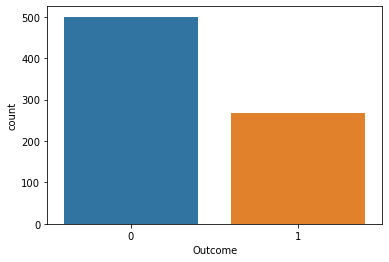

In [12]:
from itertools import cycle
color_cycle = cycle(plt.rcParams['axes.prop_cycle'].by_key()['color'])

sns.countplot(data['Outcome'])
plt.show()

Column names except for the target column are : ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']


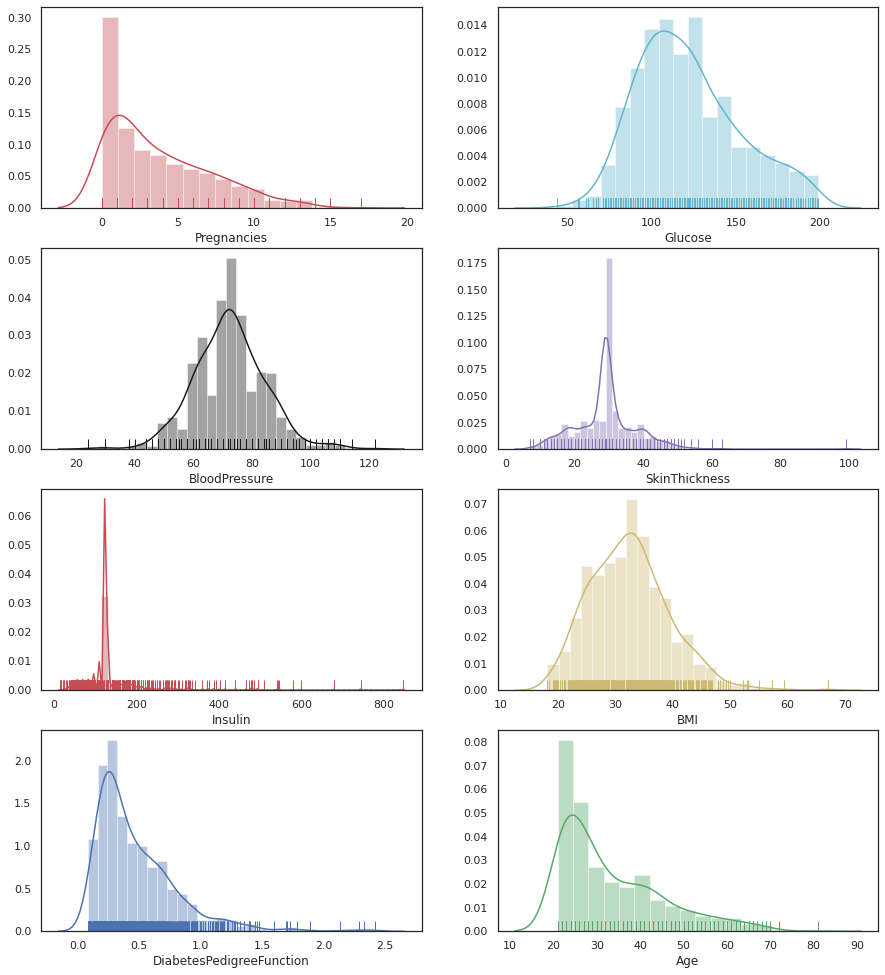

In [13]:
columns=data.columns
columns=list(columns)
columns.pop()
print("Column names except for the target column are :",columns)

#Graphs to be plotted with these colors
colours=['r','c','k','m','r','y','b','g']
sns.set(rc={'figure.figsize':(15,17)})
sns.set_style(style='white')
for i in range(len(columns)):
    
    plt.subplot(4,2,i+1)
    sns.distplot(data[columns[i]], hist=True, rug=True, color=colours[i])


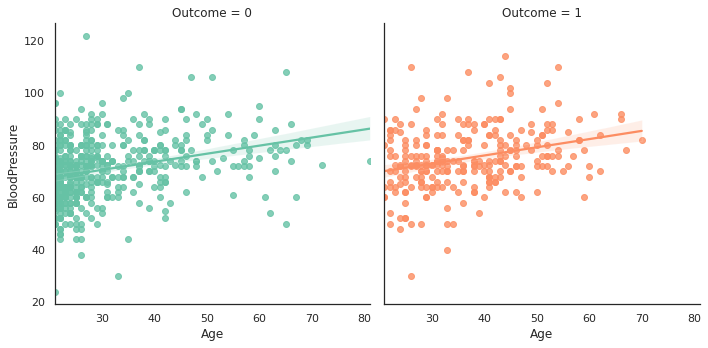

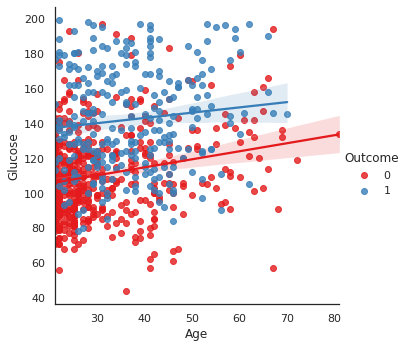

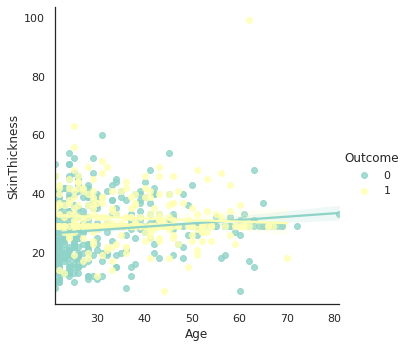

In [14]:
sns.lmplot(data=data, x="Age", y="BloodPressure",hue = "Outcome",palette="Set2",col = "Outcome")
sns.lmplot(data=data, x="Age", y="Glucose",hue = "Outcome",palette="Set1")
sns.lmplot(data=data, x="Age", y="SkinThickness",hue = "Outcome",palette="Set3")


<span style="font-size:20px;color:#0026D8;font-weight : bold">Thus, we reach a few important conclusions:</span>

- Higher Glucose level leads to more chances of Diabetes!
- Probabilty of diabetes is higher when Blood pressure is high.
- Higher the Insulin level more the chances of diabetes.
- Higher the BMI more the chances of diabetes.
- Diabetic people have higher DiabetesPedigreeFunction value i.e. genetic influence plays some role in the Diabetes among patients.
- There is less chance of diabetes among young people.



<h1 style="background-color:#ABFF9B;font-size:20px;color:#00033E;font-weight : bold">Correlation Matrix</h1>

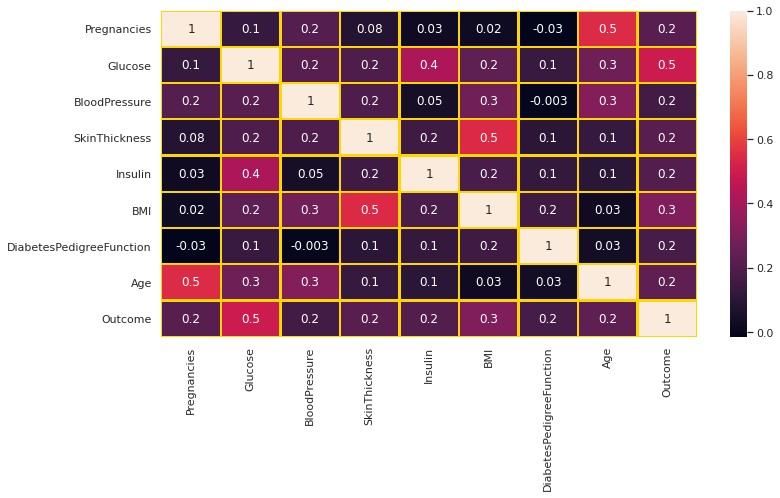

In [15]:
plt.figure(figsize =(12,6))
sns.heatmap(data.corr(),robust=True,fmt='.1g',linewidths=1.3,linecolor='gold',annot=True);

In [16]:
data.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.127911,0.208522,0.082989,0.025047,0.021565,-0.033523,0.544341,0.221898
Glucose,0.127911,1.000000,0.218367,0.192991,0.419064,0.230941,0.137060,0.266534,0.492928
BloodPressure,0.208522,0.218367,1.000000,0.192816,0.045087,0.281268,-0.002763,0.324595,0.166074
SkinThickness,0.082989,0.192991,0.192816,1.000000,0.154678,0.542398,0.100966,0.127872,0.215299
Insulin,0.025047,0.419064,0.045087,0.154678,1.000000,0.180170,0.126503,0.097101,0.203790
BMI,0.021565,0.230941,0.281268,0.542398,0.180170,1.000000,0.153400,0.025519,0.311924
DiabetesPedigreeFunction,-0.033523,0.137060,-0.002763,0.100966,0.126503,0.153400,1.000000,0.033561,0.173844
Age,0.544341,0.266534,0.324595,0.127872,0.097101,0.025519,0.033561,1.000000,0.238356
Outcome,0.221898,0.492928,0.166074,0.215299,0.203790,0.311924,0.173844,0.238356,1.000000


In [17]:
data.nunique()

Pregnancies                  17
Glucose                     136
BloodPressure                47
SkinThickness                51
Insulin                     185
BMI                         248
DiabetesPedigreeFunction    517
Age                          52
Outcome                       2
dtype: int64

In [18]:
#describing elements in data frame
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.000000,6.00000,17.00
Glucose,768.0,121.686763,30.435949,44.000,99.75000,117.000000,140.25000,199.00
BloodPressure,768.0,72.405184,12.096346,24.000,64.00000,72.202592,80.00000,122.00
SkinThickness,768.0,29.153420,8.790942,7.000,25.00000,29.153420,32.00000,99.00
Insulin,768.0,140.671875,86.383060,14.000,121.50000,125.000000,127.25000,846.00
BMI,768.0,32.457464,6.875151,18.200,27.50000,32.400000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.372500,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.000000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.000000,1.00000,1.00


<h1 style="background-color:#ABFF9B;font-size:20px;color:#00033E;font-weight : bold">Finish</h1>